In [1]:
import sys  
sys.path.insert(0, './')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Importing

In [2]:
df = pd.read_csv('../data/prices_round_2_day_-1.csv', index_col='timestamp', delimiter=';')
df.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-1,PEARLS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
0,-1,PINA_COLADAS,14999,38,14998.0,53.0,NaN,NaN,15001,38,15002.0,53.0,NaN,NaN,15000.0,0.0
0,-1,COCONUTS,7999,162,NaN,NaN,NaN,NaN,8001,55,8002.0,107.0,NaN,NaN,8000.0,0.0
0,-1,BANANAS,4951,1,4946.0,2.0,4945.0,29.0,4952,31,NaN,NaN,NaN,NaN,4951.5,0.0
100,-1,PEARLS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.0


In [3]:
df_pearls = df.loc[df['product']=='PEARLS'][['mid_price']].rename(columns={'mid_price': 'pearls'})
df_bananas = df.loc[df['product']=='BANANAS'][['mid_price']].rename(columns={'mid_price': 'bananas'})
df_pina_coladas = df.loc[df['product']=='PINA_COLADAS'][['mid_price']].rename(columns={'mid_price': 'pina_coladas'})
df_coconuts = df.loc[df['product']=='COCONUTS'][['mid_price']].rename(columns={'mid_price': 'coconuts'})
df = pd.concat([df_pearls, df_bananas, df_pina_coladas, df_coconuts], axis=1)
df.columns = pd.MultiIndex.from_product([['mid_price'], df.columns.tolist()])
df

mid_price                              
             pearls bananas pina_coladas coconuts
timestamp                                        
0           10003.0  4951.5      15000.0   8000.0
100         10000.0  4948.5      15000.0   7999.5
200         10000.0  4948.5      14999.5   7998.5
300         10000.0  4948.5      15000.0   7999.5
400         10000.0  4948.5      14999.0   7998.5
...             ...     ...          ...      ...
999500      10002.0  4894.0      15234.5   8114.5
999600      10002.0  4894.0      15236.5   8115.0
999700      10000.0  4890.5      15231.0   8113.5
999800       9998.5  4893.5      15228.5   8113.5
999900      10000.0  4895.0      15229.5   8114.0

[10000 rows x 4 columns]

# Initial Returns Observation

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

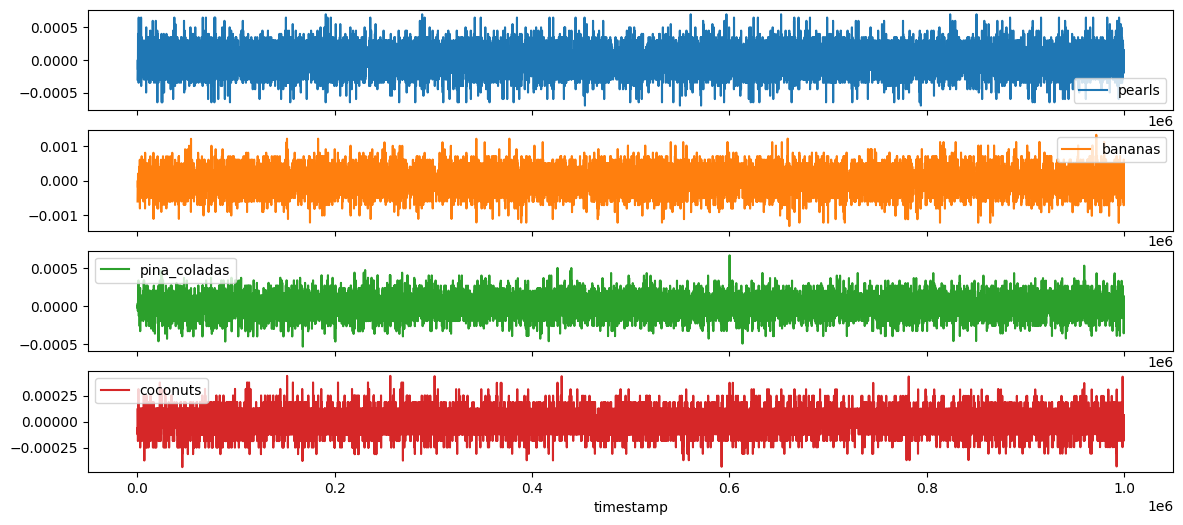

In [4]:
returns = np.log(df['mid_price']/ df['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

# Correlation Plots

array([[<Axes: xlabel='pearls', ylabel='pearls'>,
        <Axes: xlabel='bananas', ylabel='pearls'>,
        <Axes: xlabel='pina_coladas', ylabel='pearls'>,
        <Axes: xlabel='coconuts', ylabel='pearls'>],
       [<Axes: xlabel='pearls', ylabel='bananas'>,
        <Axes: xlabel='bananas', ylabel='bananas'>,
        <Axes: xlabel='pina_coladas', ylabel='bananas'>,
        <Axes: xlabel='coconuts', ylabel='bananas'>],
       [<Axes: xlabel='pearls', ylabel='pina_coladas'>,
        <Axes: xlabel='bananas', ylabel='pina_coladas'>,
        <Axes: xlabel='pina_coladas', ylabel='pina_coladas'>,
        <Axes: xlabel='coconuts', ylabel='pina_coladas'>],
       [<Axes: xlabel='pearls', ylabel='coconuts'>,
        <Axes: xlabel='bananas', ylabel='coconuts'>,
        <Axes: xlabel='pina_coladas', ylabel='coconuts'>,
        <Axes: xlabel='coconuts', ylabel='coconuts'>]], dtype=object)

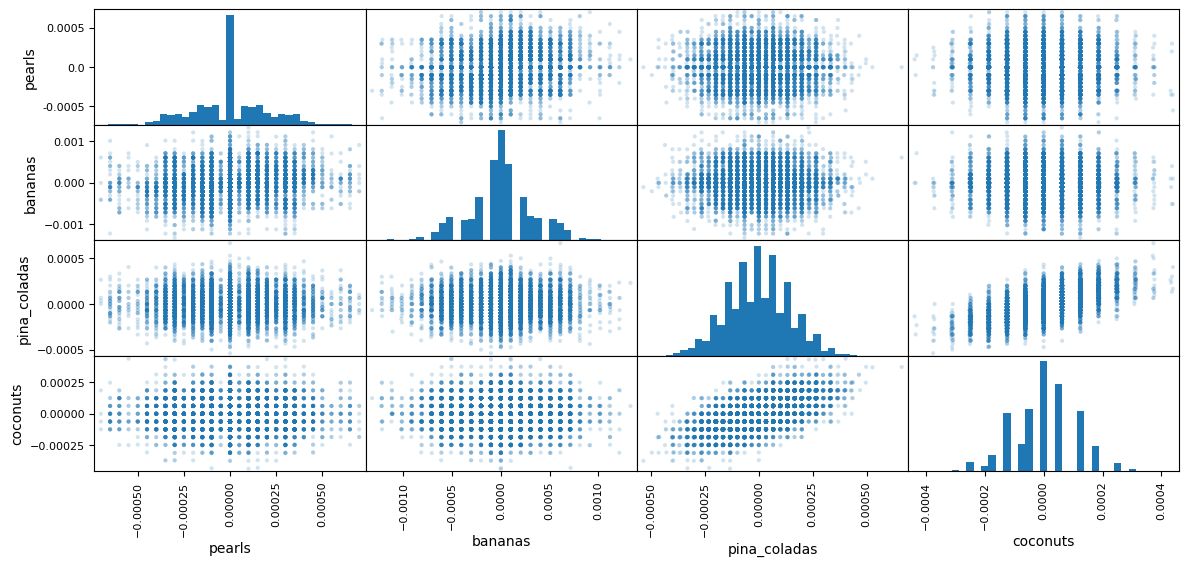

In [5]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

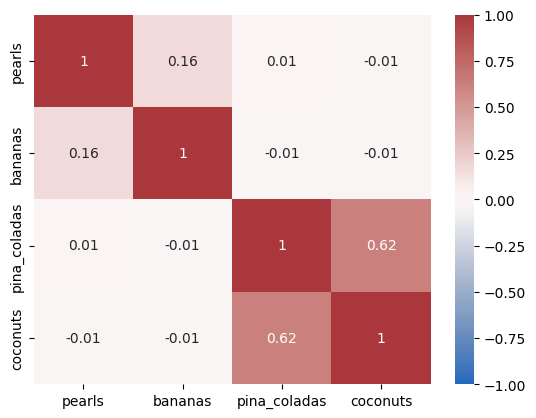

In [6]:
sns.heatmap(returns.corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

# Pairwise Scatter Plots

## Pearls vs Bananas

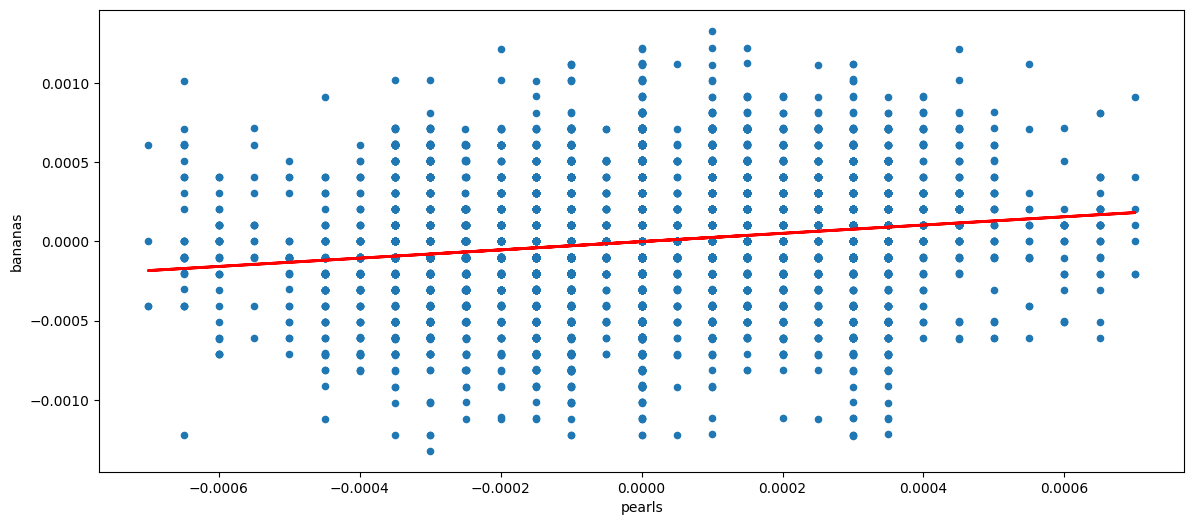

In [7]:
regression_pearls_bananas = np.polyfit(returns['pearls'], returns['bananas'], deg=1)

ax_PB = returns.plot(kind='scatter', x= 'pearls', y='bananas', figsize=(14,6))
ax_PB.plot(returns['pearls'], np.polyval(regression_pearls_bananas, returns['pearls']), 'r', lw=2)

In [8]:
returns.corr()

,pearls,bananas,pina_coladas,coconuts
pearls,1.000000,0.159836,0.008432,-0.007195
bananas,0.159836,1.000000,-0.005629,-0.006923
pina_coladas,0.008432,-0.005629,1.000000,0.623097
coconuts,-0.007195,-0.006923,0.623097,1.000000


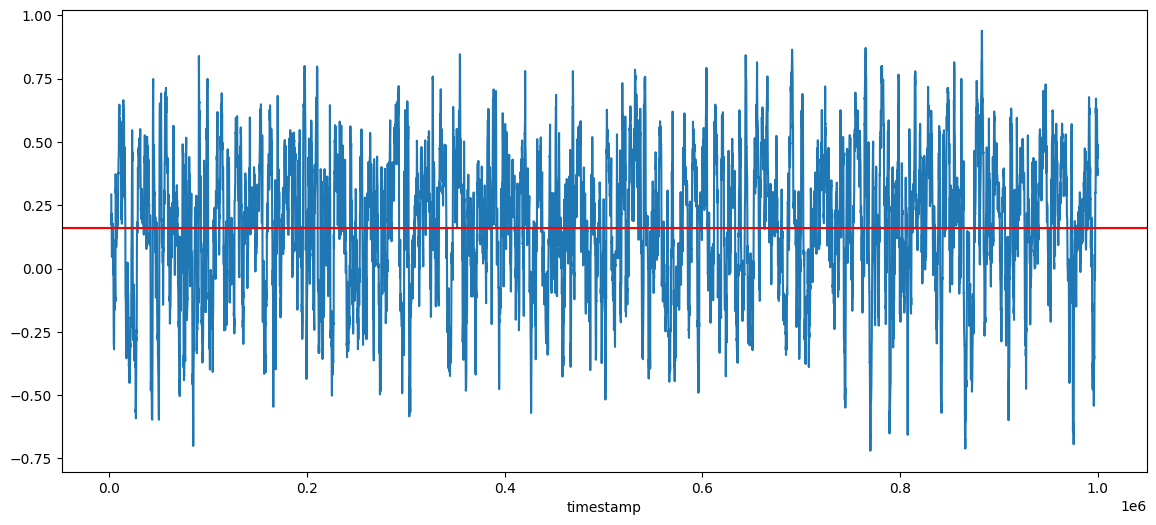

In [9]:
ax = returns['pearls'].rolling(window=20).corr(returns['bananas']).plot(figsize=(14,6))
ax.axhline(returns.corr().iloc[0,1], c='r')

## Coconuts vs Pina Coladas

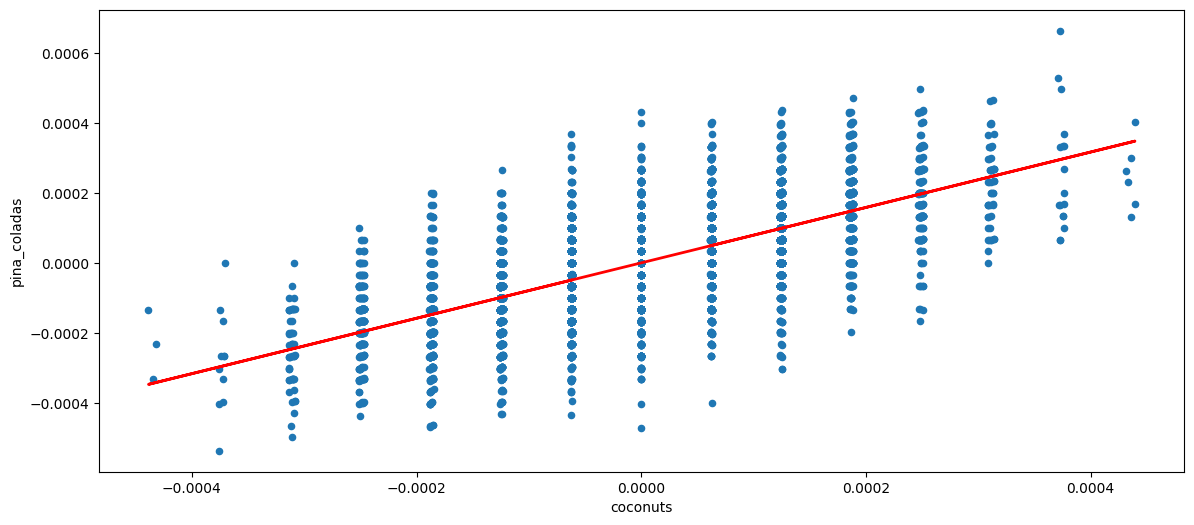

In [10]:
regression_coconuts_coladas = np.polyfit(returns['coconuts'], returns['pina_coladas'], deg=1)

ax_CPC = returns[['coconuts', 'pina_coladas']].plot(kind='scatter', x= 'coconuts', y='pina_coladas', figsize=(14,6))
ax_CPC.plot(returns['coconuts'], np.polyval(regression_coconuts_coladas, returns['coconuts']), 'r', lw=2)

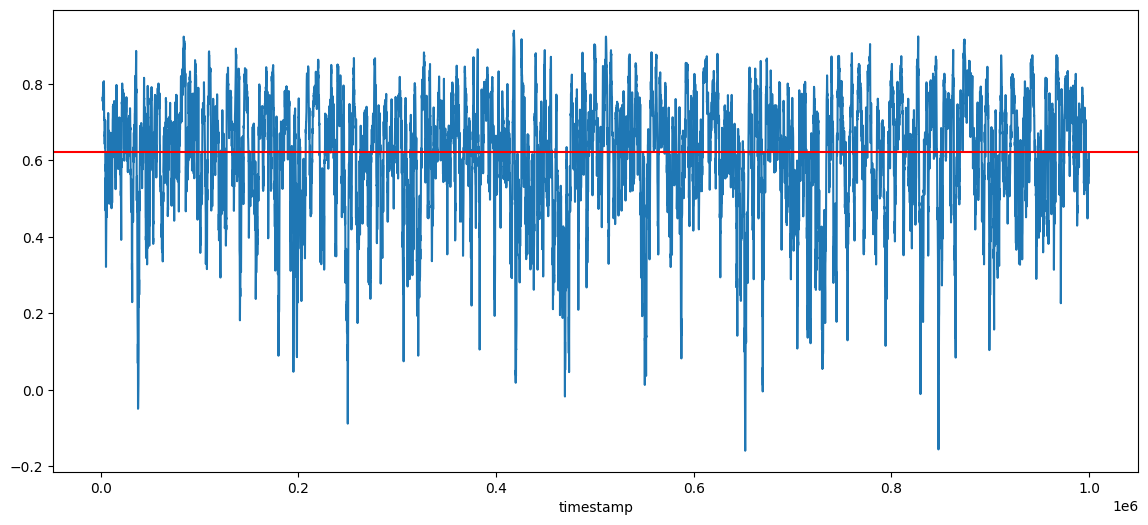

In [11]:
ax_CPC = returns['coconuts'].rolling(window=20).corr(returns['pina_coladas']).plot(figsize=(14,6))
ax_CPC.axhline(returns.corr().iloc[2,3], c='r')